In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
print("\n--- PART 1: LOADING DATA ---")
df_csv = pd.read_csv("./data/Titanic-Dataset.csv")
print("Loaded CSV Head:")
print(df_csv.head(2))


--- PART 1: LOADING DATA ---
Loaded CSV Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [6]:
print("\n--- PART 2: PRE-PROCESSING ---")
# Create a copy to simulate dirty data
df_dirty = df_csv.copy()

# Inject errors
df_dirty.loc[0, 'Age'] = 200  # Outlier

# Fix Data
# 1. Fill Missing Age with Median
median_age = df_dirty['Age'].median()
df_dirty['Age'] = df_dirty['Age'].fillna(median_age)

# 2. Remove Outliers (Cap at 100)
df_clean = df_dirty[df_dirty['Age'] <= 100].copy()

print(f"Max Age after cleaning: {df_clean['Age'].max()}")


--- PART 2: PRE-PROCESSING ---
Max Age after cleaning: 80.0



--- PART 3: GENERATING PLOTS ---


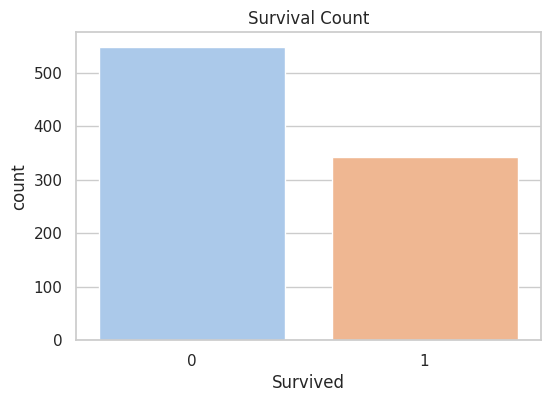

Text(0.5, 1.0, 'Fare Price by Passenger Class')

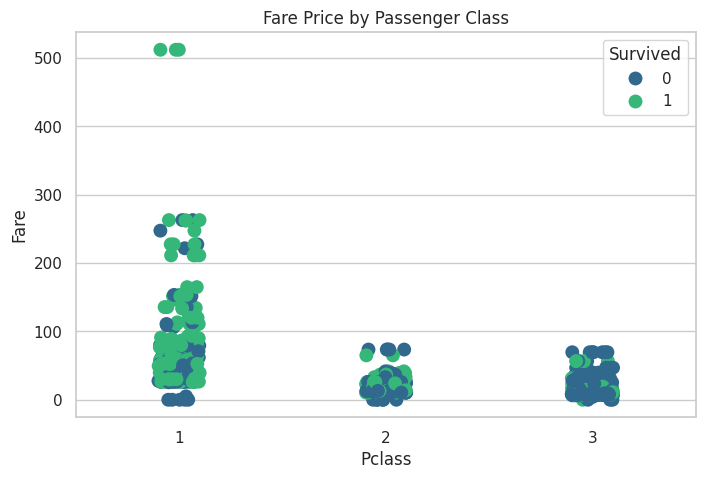

In [10]:
print("\n--- PART 3: GENERATING PLOTS ---")
sns.set_theme(style="whitegrid")

# Plot 1: Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Survived', hue='Survived', legend=False, palette='pastel')
plt.title("Survival Count")
plt.show() # In a script this opens a window, in notebook it displays inline

# Plot 2: Fare vs Class
plt.figure(figsize=(8, 5))
sns.stripplot(data=df_clean, x='Pclass', y='Fare', hue='Survived', size=10, palette='viridis')
plt.title("Fare Price by Passenger Class")

In [12]:
print("\n--- PART 4: EXPORTING ---")
os.makedirs('/output', exist_ok=True)
save_path = '/output/fare_analysis.png'
plt.savefig(save_path, dpi=300)
print(f"Plot saved to {save_path}")


--- PART 4: EXPORTING ---


PermissionError: [Errno 13] Permission denied: '/output'